<a href="https://colab.research.google.com/github/ImanAyaz10/waste-classification-project-SA-AI/blob/main/week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week 10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/datasets/DATASET/dataset/DATASET/TRAIN"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    subset='training',
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(150,150,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False


/tmp/ipython-input-2451916969.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 5749s 10s/step - accuracy: 0.8786 - loss: 0.2963 - val_accuracy: 0.9402 - val_loss: 0.1594
Epoch 2/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 484s 856ms/step - accuracy: 0.9307 - loss: 0.1743 - val_accuracy: 0.9355 - val_loss: 0.1598
Epoch 3/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 479s 848ms/step - accuracy: 0.9436 - loss: 0.1455 - val_accuracy: 0.9286 - val_loss: 0.1751


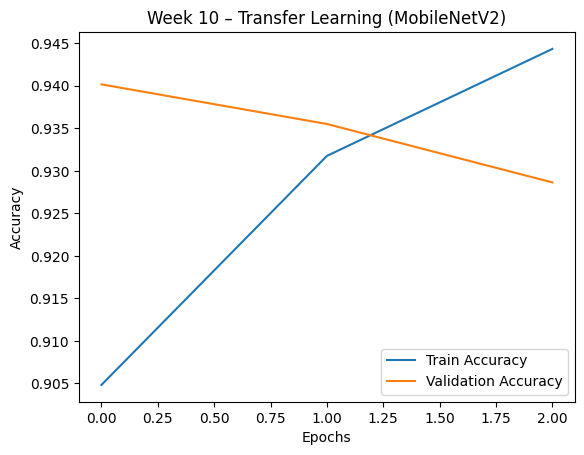

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Week 10 – Transfer Learning (MobileNetV2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [13]:
model.save("/content/drive/MyDrive/mobilenet_week10.h5")
print("✅ Week 10 model saved to Google Drive")


✅ Week 10 model saved to Google Drive
